In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

In [ ]:
class Student():
    def __init__(self):
        pass

    def get_reward(self,action):
        if action == 0:
            score = truncnorm(a=(0-40)/40, b=(100-40)/40, loc=40, scale=40).rvs(size=1).astype(int)
        elif action == 1:
            score = truncnorm(a=(0-60)/10, b=(100-60)/10, loc=60, scale=10).rvs(size=1).astype(int)
        else:
            score = truncnorm(a=(0-50)/20, b=(100-50)/20, loc=50, scale=20).rvs(size=1).astype(int)

        return score

In [ ]:
class Environment:
    def __init__(self, student):
        self.student = student

    def calc_reward(self,action):
        reward = self.student.get_reward(action)
        return reward

###     The expected reward for each action, according to the given reward function, is as follows:

In [ ]:
q_star = [40, 60, 50]
a_star = np.argmax(q_star)      #The optimal action
print("Optimal action is using method No.%s"%(a_star+1))

Optimal action is using method No.2


###     We use the above expected reward of each action in order to caculate the <font color="Red">Regret</font>

In [ ]:
def softmax(H):
    h = H - np.max(H)
    exp = np.exp(h)
    return exp / np.sum(exp)

In [ ]:
class Gradient_Bandit_agent:
    def __init__(self, env, learning_rate, No_Arms):
        self.env = env
        self.learning_rate = learning_rate
        self.No_Arms = No_Arms



    def gradient_bandit_alg(self, num_iter):

        H = np.zeros(self.No_Arms)      # Initiate the preferences by zero
        reward_hist = []
        regret_hist = []
        alpha = self.learning_rate

        for _ in range(num_iter):

            policy = softmax(H)     # Policy pi
            action = np.random.choice(self.No_Arms, p=policy)       # Sampling (choice) action by policy
            reward = self.env.calc_reward(action)       # R_t (reward for chosen action)
            reward_hist.append(reward)
            div_opt_act = q_star[a_star] - q_star[action]       # This parameter shows the difference between the diviation from optimal action in term of expected reward
            regret_hist.append(div_opt_act)
            avg_reward = np.average(reward_hist)        # Update a == A_t (chosen action)
            H[action] = H[action] + alpha*(avg_reward)*(1-policy[action])       # Update a != A_t (non-chosen action)
            H[:action] = H[:action] - alpha*(avg_reward)*policy[:action]
            H[action+1:] = H[action+1:] - alpha*(avg_reward)*policy[action+1:]

        return softmax(H), reward_hist, regret_hist

In [ ]:
student = Student()
env = Environment(student)

def plot(env:Environment, learning_rate, No_Arms=3, num_schools=10):

    _, axs = plt.subplots(2, 2, figsize=(18, 9))
    all_rewards = []
    all_regrets = []

    for _ in range(num_schools):

        agent = Gradient_Bandit_agent(env, learning_rate, No_Arms)
        _, rewards, regrets = agent.gradient_bandit_alg(52*100)     # Because we have 52 weeks in a year and 100 students
        cum_rewards, cum_regrets = np.cumsum(rewards).tolist(), np.cumsum(regrets).tolist()
        all_rewards.append(cum_rewards)
        all_regrets.append(cum_regrets)

    for i in range(num_schools):

        axs[0][0].plot(all_rewards[i])
        axs[0][1].plot(all_regrets[i])

        axs[0][0].set_title("Reward for a Schools")
        axs[0][0].set_xlabel("Trials")
        axs[0][0].set_ylabel("Reward")

        axs[0][1].set_xlabel("Trials")
        axs[0][1].set_ylabel("Regret")
        axs[0][1].set_title("Regret for Schools")

    # Calculate the mean and standard deviation of the reward and regret sequences
    mean_reward, mean_regret = np.mean(all_rewards, axis=0), np.mean(all_regrets, axis=0)
    std_reward, std_regret = np.std(all_rewards, axis=0), np.std(all_regrets, axis=0)

    # Calculate the confidence interval for the mean regret
    upper_bound_reward, upper_bound_regret = mean_reward + 1.96 * std_reward / np.sqrt(num_schools), mean_regret + 1.96 * std_regret / np.sqrt(num_schools)
    lower_bound_reward, lower_bound_regret = mean_reward - 1.96 * std_reward / np.sqrt(num_schools), mean_regret - 1.96 * std_regret / np.sqrt(num_schools)

    axs[1][0].plot(mean_reward, label="Mean Reward")
    axs[1][0].fill_between(np.arange(len(mean_reward)), lower_bound_reward ,upper_bound_reward , alpha=0.5, label="Confidence Interval")

    axs[1][1].plot(mean_regret, label="Mean Reward")
    axs[1][1].fill_between(np.arange(len(mean_regret)), lower_bound_regret ,upper_bound_regret , alpha=0.5, label="Confidence Interval")

    # Set the title and labels
    axs[1][0].set_title("Mean Regward of 10 Run with 95% Confidence Interval")
    axs[1][0].set_xlabel("Trial")
    axs[1][0].set_ylabel("Reward")

    axs[1][1].set_title("Mean Regret of 10 Run with 95% Confidence Interval")
    axs[1][1].set_xlabel("Trial")
    axs[1][1].set_ylabel("Regret")

    plt.show()

### For <font color='red'>learning_rete = 0.001</font>

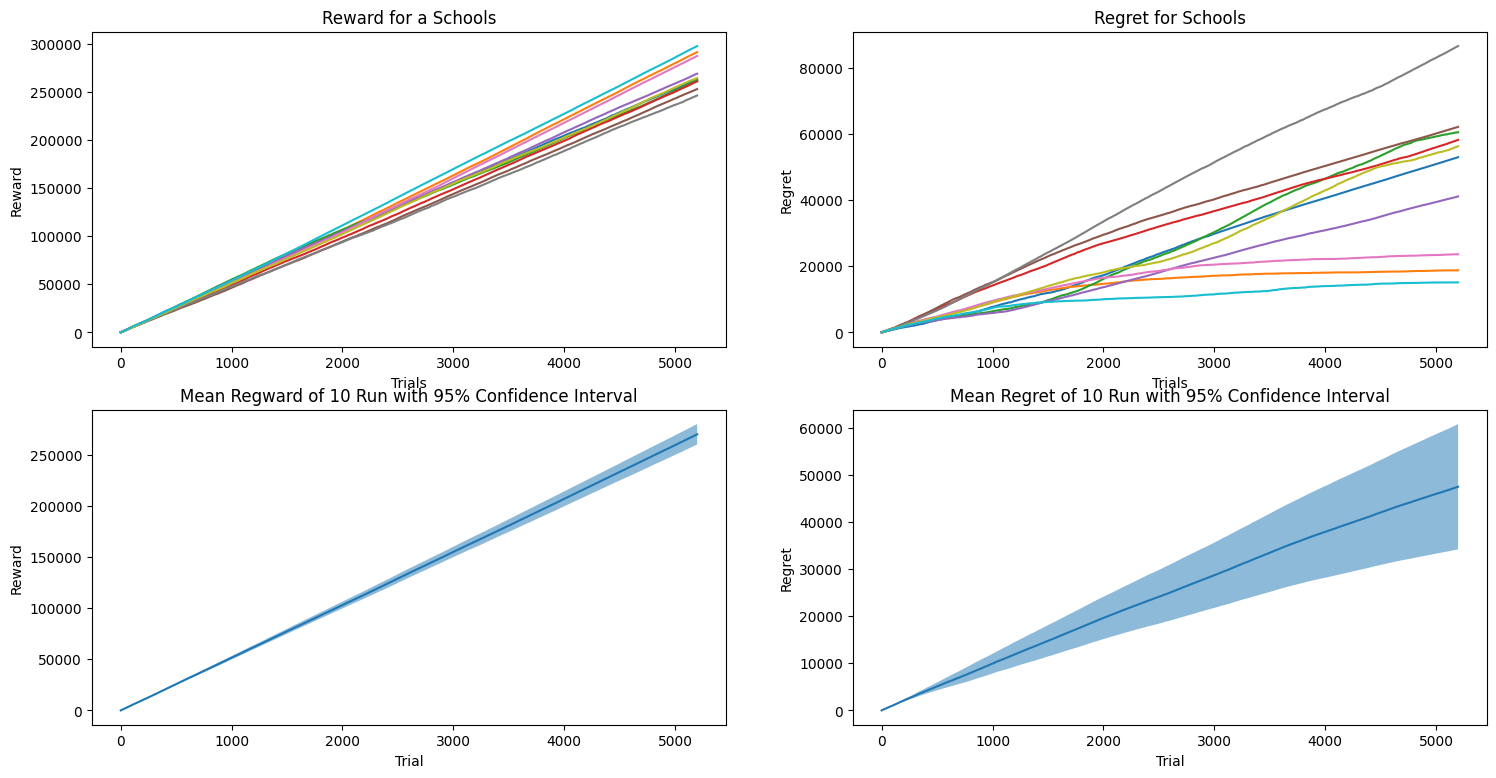

In [ ]:
plot(env, 0.001)

### For <font color='red'>learning_rete = 0.01</font>

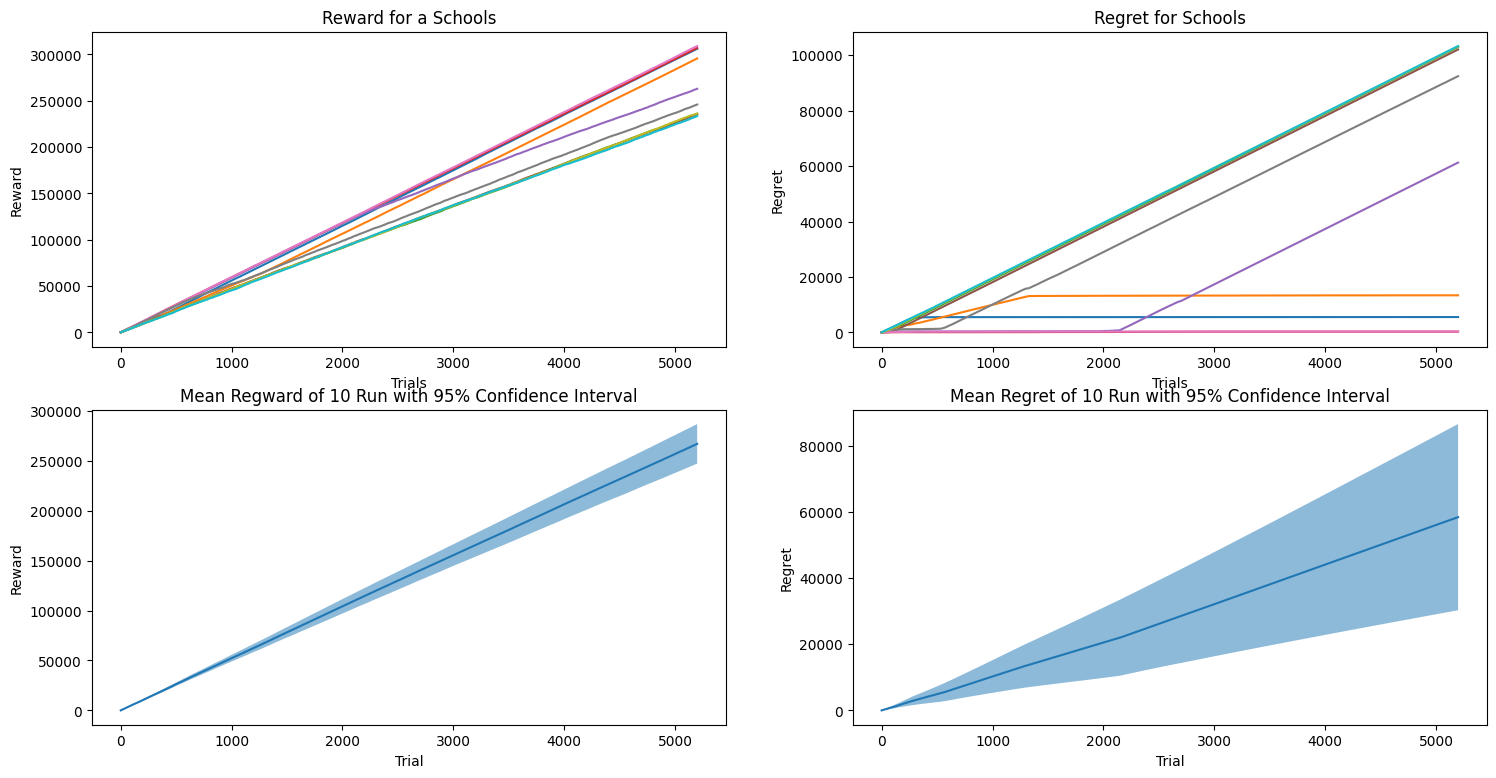

In [ ]:
plot(env, 0.01)

### For <font color='red'>learning_rete = 0.1</font>

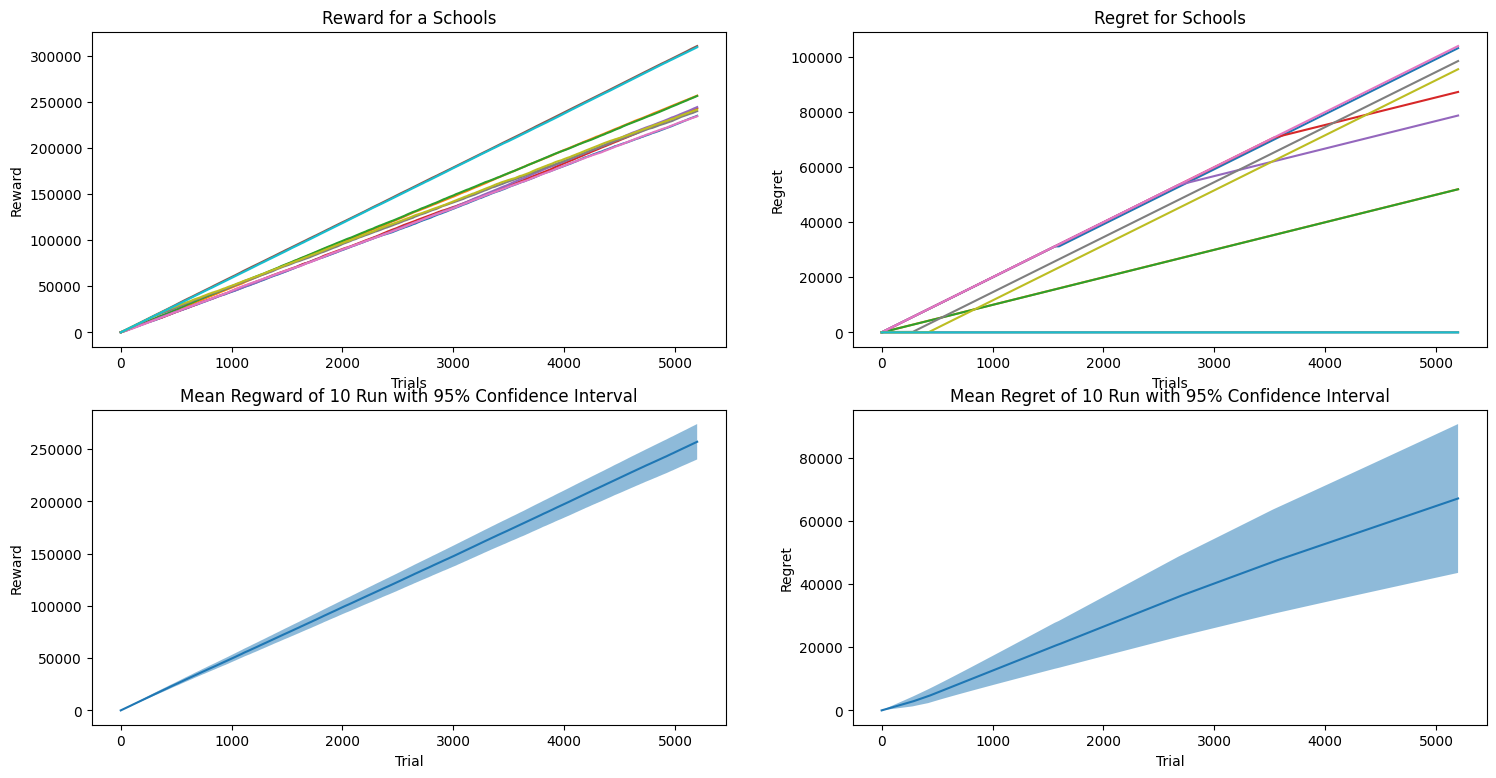

In [ ]:
plot(env, 0.1)